<a href="https://colab.research.google.com/github/RiyaShukla07/oibsip/blob/main/EmailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RIYA SHUKLA**

Data Science Internship @oasis Infobyte

Task 4 - Email Spam Detection with Machine Learning



PROBLEM STATEMENT

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

In [1]:
# Import necessary libraries
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv("/spam.csv", encoding='ISO-8859-1')[['v1', 'v2']]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

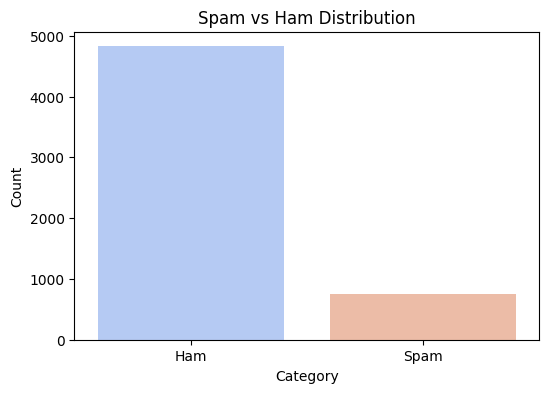

In [3]:
# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data['label'], palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.title('Spam vs Ham Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [4]:
# Function to clean text
def clean_text(text):
    return re.sub(r'\d+', '', text.lower().translate(str.maketrans('', '', string.punctuation))).strip()


In [5]:
# Apply text cleaning
data['message'] = data['message'].apply(clean_text)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


In [7]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
# Train and evaluate model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [9]:
# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9695


In [10]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



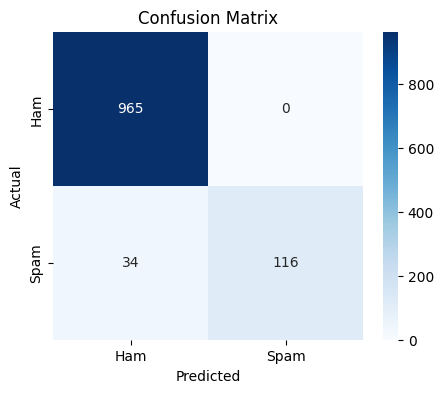

In [11]:
# Display confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
